# EDA(Exploratory Data Analysis)

### 1.Load datasets

### 2.Clean data(missing values,duplicates,types)

### 3.Treat outliers

### 4.Univariate,Bivariate,Multivariate analysis

### 5.Insights 


### Outlier- a data point that is significantly different from other observations in a dataset

### How outliers occur---
1. Measurement errors
2. data entry mistakes


### Why are they important---
1. They can tb errors.
2. They effect the data analysis

### how to identify the outliers---
1. Statistical methods

---> Interquartile Range(IQR)
---> Z-Score

 2. Visualization techniques

---> Box plots
---> scatter plots
---> Histograms

### Univariate analysis - a method that analyzes a single variable to describe its characteristics and finding patterns and summarize the data.
### It involves only one variable

### Bivariate analysis - it will give the relationship between 2 variables.
### It involes 2 variables(x & y)

### Multivariate analysis - to understand how multiple factors interact & influence each other.
### It involves ore than 2 variables
#### Example -
#### How our age,income and education level together influence the purchasing behavior.


# ETL   


## EDA :< Dataset>
1. Load & Overview
2. Cleaning(missing,dupes,dtypes)
3. Uni,Bi & multivariate analysis
4. Outlier-IQR
5. Feature engineering - it is the process of turning raw data into useful featured that helps to improve the performance of machine learning models.
6. key Insights


## 1.Load libraries and datasets




In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df= sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
# Basic infor mation and overview
print("Shape of the dataset:",df.shape)
print("\n Data info:\n")
df.info()

Shape of the dataset: (891, 15)

 Data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
# Missing values analysis

missing=pd.DataFrame({
    'missing count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/ len(df))*100
})
missing.sort_values(by ='missing_percent',ascending=False)

,missing count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [18]:
# 4. handling missing values

# Fill numeric missing values with the mean
df['age'] = df['age'].fillna(df['age'].mean())

# Fill categorical missing values with the mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop 'deck' column (too many missing values)
df.drop(columns=['deck'], inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum().sum())



Missing values after cleaning:
 2


### Insight: 
1. we filled important columns and removed highly missing ones.This keeps maximum information while making the dataset clean.

In [20]:
# Duplicates and data type check
print("Duplicate rows:",df.duplicated().sum())

# convert some columns to category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')

df.info()

Duplicate rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


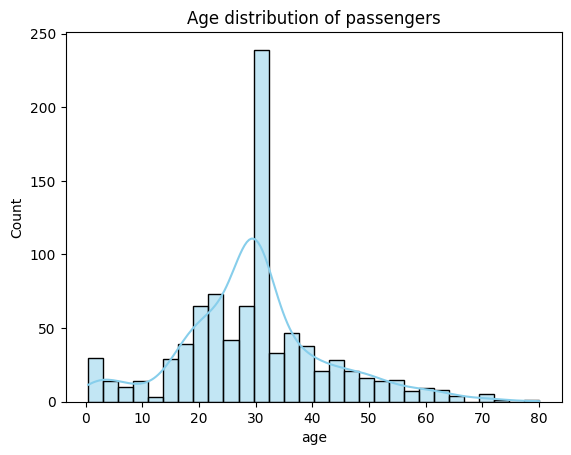

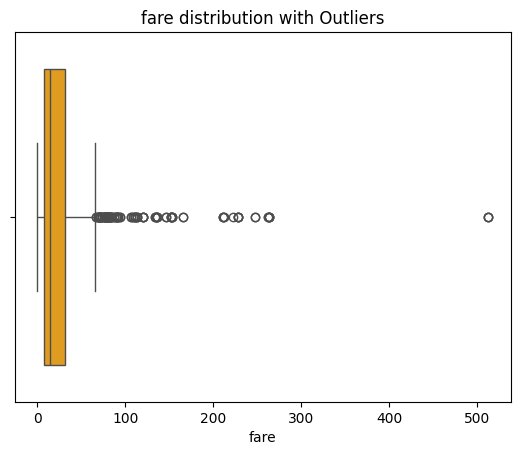

In [23]:
# 6.Univariate Analysis - Numerical Features

num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#Histogram : Age
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title('Age distribution of passengers')
plt.show()

#Boxplot: fare
sns.boxplot(x=df['fare'],color='orange')
plt.title("fare distribution with Outliers")
plt.show()

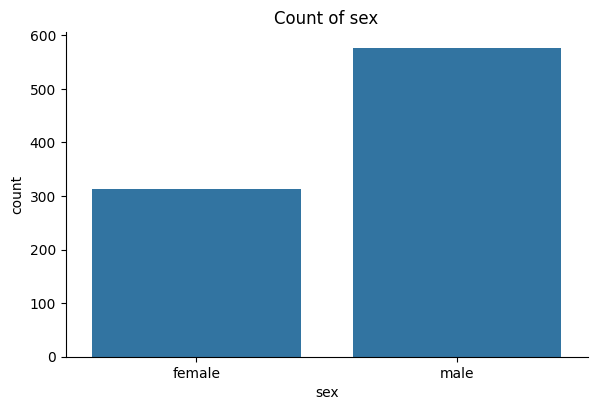

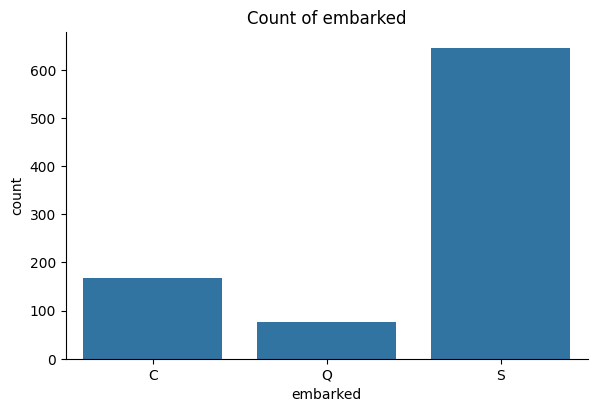

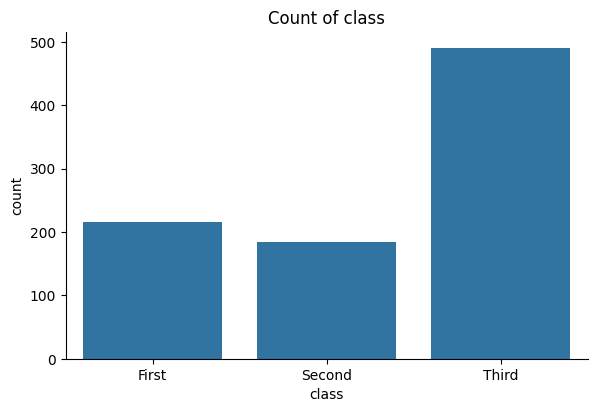

In [25]:
# Univariate Analysis - Categorical Features
cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    sns.catplot(x=col, data=df, kind='count', height=4, aspect=1.5)
    plt.title(f"Count of {col}")
    
plt.show()


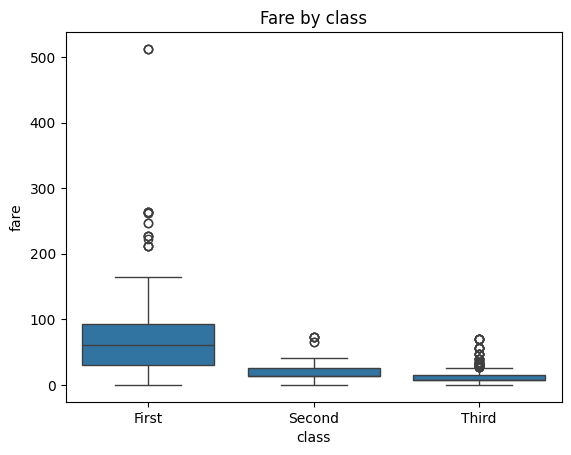

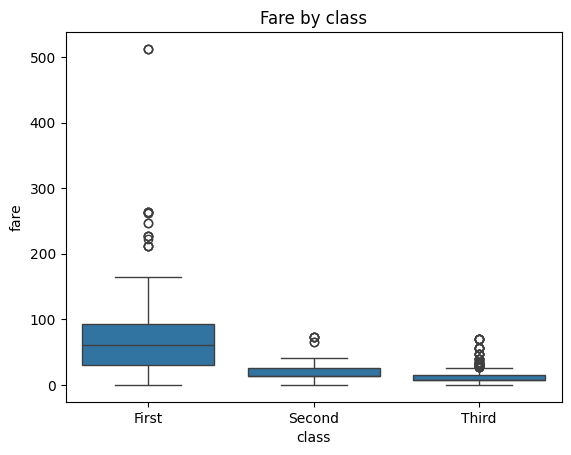

In [ ]:
# Bivariate analysis - Numerical vs categorical

sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()




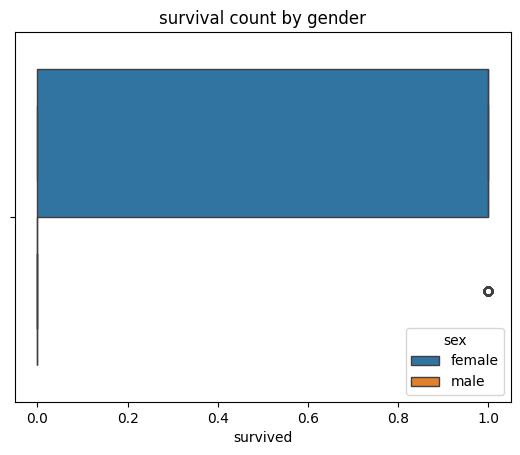

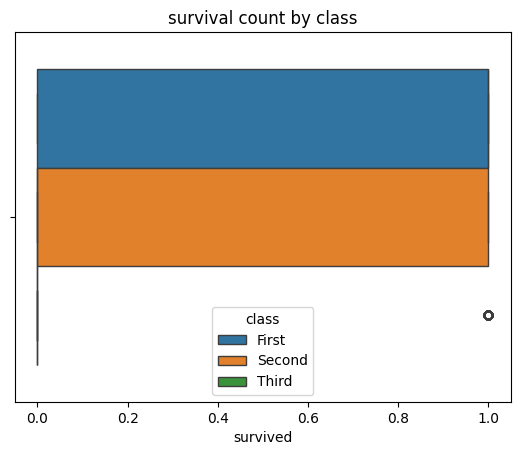

In [28]:
# Bivariate analysis - categorical vs categorical

sns.boxplot(x='survived',hue='sex',data=df)
plt.title("survival count by gender")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("survival count by class")
plt.show()


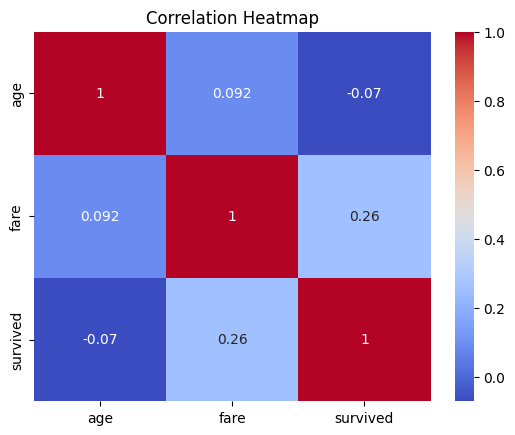

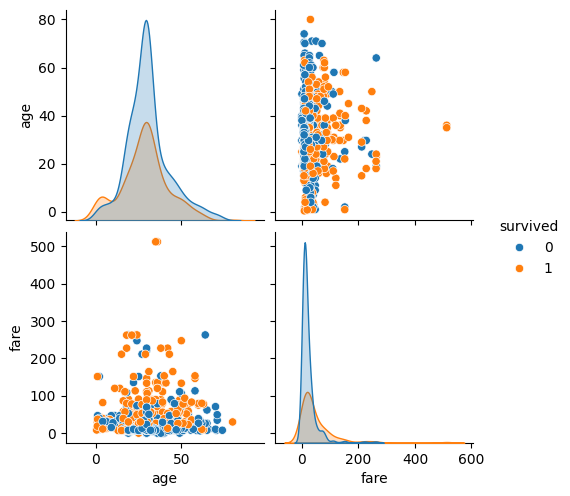

In [31]:
# Correlation and Multivariate Analysis

corr = df[['age', 'fare', 'survived']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()


### Insights -

1. Fare has a positive correlation with survival 
2. Age shows a slight negative correlation with survival 

Number of outliers in fare: 891
fare after outlier capping


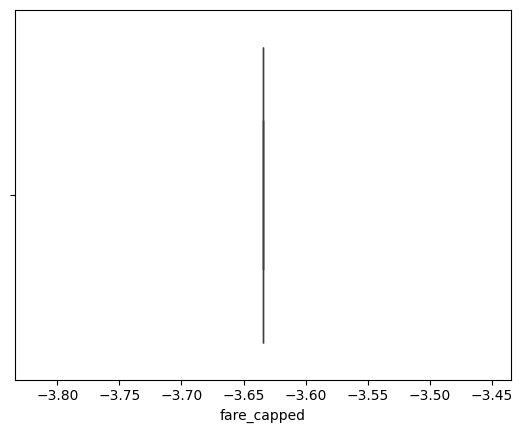

In [35]:
# Outlier Deletion using IQR
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1

lower=Q1 - 1.5 * IQR
upper=Q3 - 1.5 * IQR

outliers=df[(df['fare']<lower) | (df['fare']>upper)]
print("Number of outliers in fare:",len(outliers))

#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
print("fare after outlier capping")
plt.show()

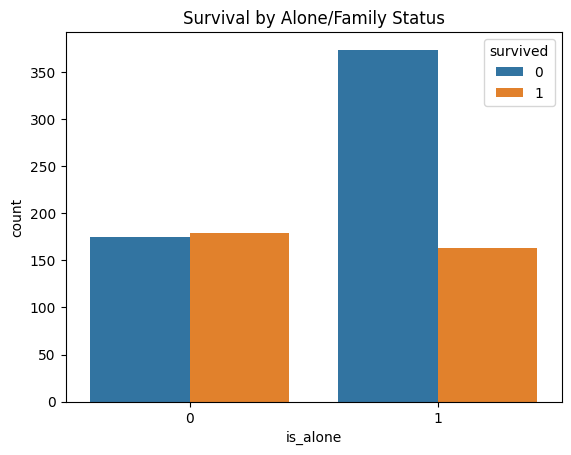

,family_size,is_alone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


In [39]:
# Feature Engineering

# Create new features
df['family_size'] = df['sibsp'] + df['parch'] + 1

df['is_alone'] = (df['family_size'] == 1).astype(int)

sns.countplot(x='is_alone', hue='survived', data=df)
plt.title("Survival by Alone/Family Status")
plt.show()

df[['family_size', 'is_alone']].head()


In [40]:
# Export the cleaned data
df.to_csv("titanic_cleaned.csv",index=False)
print("\n Cleaned Titanic data saved as titanic_cleaned.csv")


 Cleaned Titanic data saved as titanic_cleaned.csv


In [41]:
import os
print(os.getcwd())

c:\Users\sindh\OneDrive\Desktop\DataAnalysis
